# Scipy

In [1]:
import scipy
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Priklad 1.

Najdite priesecnik funkcii

$f:y=x$
$g:y=\cos{x}$

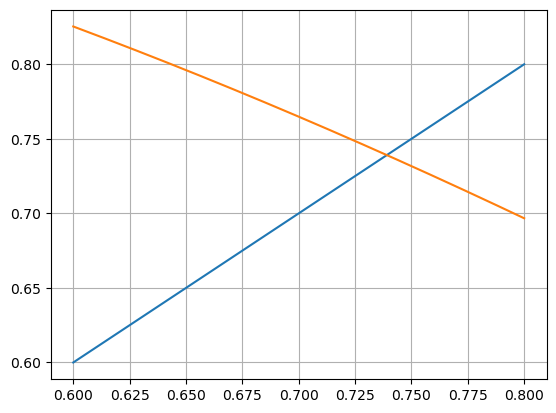

In [3]:
x = np.linspace(0.6, 0.8, 10000)
fy = x
gy = np.cos(x)
plt.plot(x, fy, x, gy);
plt.grid()

In [4]:
from scipy import optimize as so

In [5]:
x= so.fsolve(lambda x:x-np.cos(x), 0.725)[0]
x

0.7390851332151607

In [6]:
# skuska spravnosti
x==np.cos(x)

True

### Priklad 2.

Vypocitajte obsah plochy ohranicenej grafom funkcie

$f:y=\mathrm e^{-x^2}.\sin{x},$

priamkami $x=2$, $x=5$ a osou $x.$

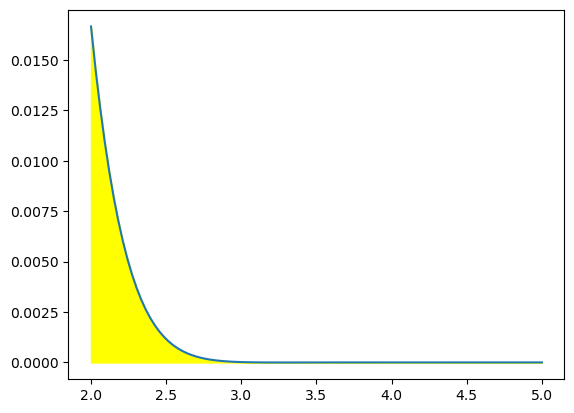

In [7]:
# nakreslime
x = np.linspace(2,5,100)
y = np.exp(-x**2) * np.sin(x)
plt.plot(x,y);
plt.fill_between(x,y, color='yellow');

In [8]:
from scipy import integrate as si

In [9]:
# budeme pocitat urcity integral
si.quad(lambda x:np.exp(-x**2) * np.sin(x),2,5)

(0.003272143887733095, 7.682761075211332e-14)

In [10]:
P = si.quad(lambda x:np.exp(-x**2) * np.sin(x),2,5)[0]
P

0.003272143887733095

### Priklad 3.

Vypocitajte obsah plochy ohranicenej grafmo dvoch funkcii

$f:y=(x-0.5)^2$

$g:y=x\mathrm e^{-x^{2}}$

[0.5]


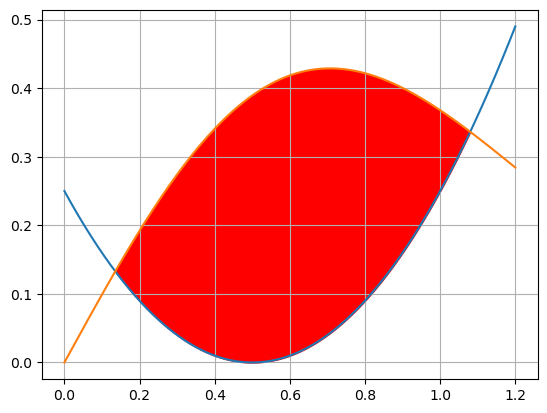

In [11]:
x = np.linspace(0, 1.2, 10000)
f = lambda x:(x - 0.5) ** 2
g = lambda x:x * np.exp(-x**(2))
fy = f(x)
gy = g(x)
plt.plot(x, fy);
plt.plot(x, gy);
plt.grid()
priesecnik1 = so.fsolve(f, 0.2)
print(priesecnik1)
plt.fill_between(x, f(x), g(x), where=f(x)<=g(x), color='red');

In [12]:
# vypocitame priesecniky
x1= so.fsolve(lambda x:f(x)-g(x), 0.2)[0]
x2= so.fsolve(lambda x:f(x)-g(x), 1)[0]
x1,x2

(0.13539573382603787, 1.0800032872460115)

In [13]:
# vypocitame obsah plochy
Ig = si.quad(g,x1,x2)[0]
If = si.quad(f,x1,x2)[0]
P = Ig - If
P

0.2539806537666218

In [14]:
# alebo 
si.quad(lambda x: g(x) - f(x), x1, x2)[0]

0.25398065376662193

### Priklad 4.

Najdite Taylorov polynom stupna $n$ so stredom v bode $x_0$ pre funkciu

$f:y=\cos{x^3}$

In [15]:
from scipy import interpolate as sip

In [16]:
f = lambda x: np.cos(x**3)
x0 = 0
n = 7
scale = 1

In [17]:
koef = sip.approximate_taylor_polynomial(f,x0,n,scale)
koef

poly1d([ 0.16052868, -0.43640048, -0.24079302, -0.0374541 ,  0.10033042,
        0.00412384, -0.01003304,  1.        ])

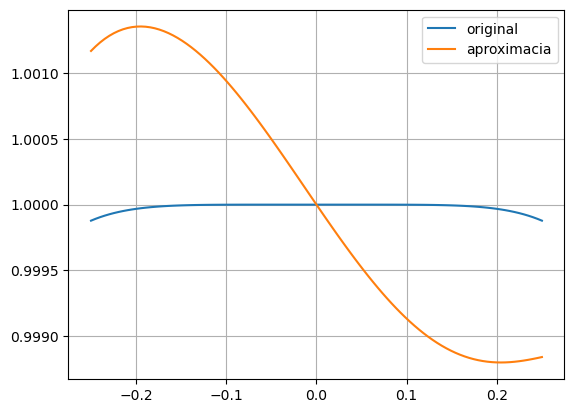

In [18]:
# ilustracia
t = lambda x: np.polyval(koef, x)
x = np.linspace(-0.25,0.25,100)
plt.plot(x, f(x), label='original');
plt.plot(x, t(x), label='aproximacia');
plt.grid()
plt.legend();

### Priklad 5.

Interpolacia a extrapolacia dat

In [21]:
# vygenerujeme data
f = lambda x: np.sin(x)
x = np.linspace(0, 9, 100)


In [29]:
n = np.linspace(0, 9, 20)
g = lambda n: f(n) + 0.1 * np.random.rand(len(n))
yn = g(n)

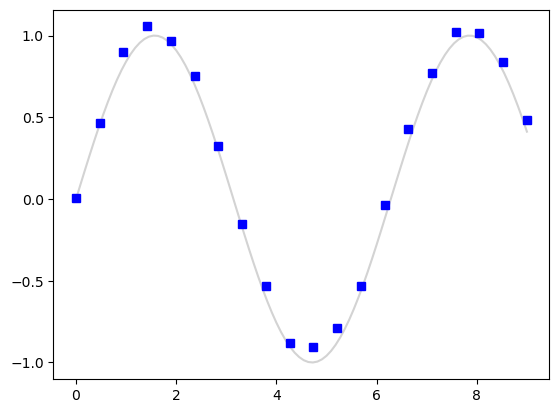

In [31]:
# nakreslime
plt.plot(x, f(x), color='lightgray');
plt.plot(n, yn, 'bs');

In [32]:
# linerana interpolacia
li = sip.interp1d(n, yn)

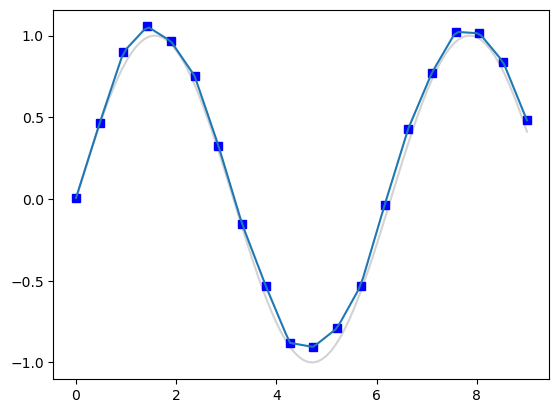

In [34]:
# ilustracia
plt.plot(x, f(x), color='lightgray');
plt.plot(n, yn, 'bs');
plt.plot(x,li(x));

In [35]:
# kubicka interpolcia
kub = sip.interp1d(n, yn, kind='cubic')

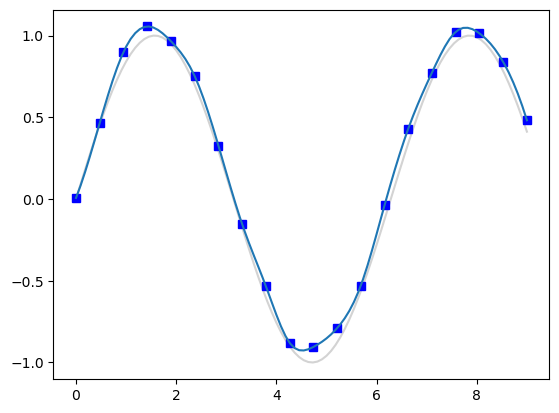

In [37]:
plt.plot(x, f(x), color='lightgray');
plt.plot(n, yn, 'bs');
plt.plot(x,kub(x));

In [48]:
# interpolacia pomocou splajnov
spl = sip.UnivariateSpline(n, yn, s=0.25)

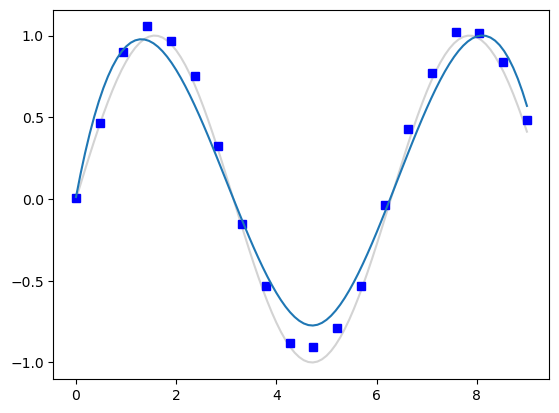

In [49]:
plt.plot(x, f(x), color='lightgray');
plt.plot(n, yn, 'bs');
plt.plot(x,spl(x));